In [30]:
#Load the library required for tree analysis.
#conda install python-graphviz : Installation using the conda install python-graphviz command does not require setting a path.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import os 
import graphviz
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import seaborn as sns

In [31]:
#Call up Asthma data. 
table1 = pd.read_csv("C:\\Users\\scsi_public\\Desktop\\intern\\Asthma_variable.csv", encoding="cp949")
table1 = table1.fillna(0)

#Set Asthma above 0.24 (top 33.3%) high, 0.17 above (top 66.6%) medium, and 017 below (bottom 33%) low.
table1.loc[table1.Asthma >= 0.24, "Asthma"] = 100
table1.loc[(table1.Asthma >= 0.17) & (table1.Asthma <= 0.24), "Asthma"] = 50
table1.loc[table1.Asthma <= 0.17, "Asthma"] = 0

table1.loc[table1.Asthma == 100, "Asthma"] = "High"
table1.loc[table1.Asthma == 50, "Asthma"] = "Medium"
table1.loc[table1.Asthma == 0, "Asthma"] = "Low"


#Convert to string type
table1 = table1.astype('string')
table1

,Asthma,Total local tax,Acquisition tax,Automobile tax,Region development tax,Urban planning tax,local education tax,licence tax,property tax,revenue tax for previous year,...,Marital status: live together,Marital status: separated,Marital status: widowed,Marital status: divorced,Residence period less than 5 years in a city,Residence period less than 5~10 years in a city,Residence period less than 10~15 years in a city,Residence period less than 15~20 years in a city,Residence period more than 20 years in a city,monthly income
0,Medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Medium,0.052777095999999996,0.11254758699999999,0.029476774,0.029752522000000003,0.013632838999999999,0.021319894,0.123255349,0.06669359700000001,0.175818865,...,0.335919883,0.134467121,0.138992683,0.347879311,0.18116575899999998,0.24936903100000002,0.25718389,0.17082909300000002,0.7806640909999999,0.55130734
2,Low,0.034131357,0.089554811,0.01904257,0.023035708999999998,0.013141545,0.01517037,0.062423947,0.040687712,0.17003200300000001,...,0.335202289,0.49087124,0.0,0.140519383,0.239488919,0.431068515,0.29197329,0.123058764,0.723556455,0.5751725010000001
3,Low,0.043340674,0.10434463199999999,0.027804152999999998,0.022541215,0.014207104,0.023788742,0.083099336,0.055098897,0.177562247,...,0.49197473,0.411602084,0.058536593,0.352079984,0.16270548099999999,0.227399346,0.33949178700000004,0.207933822,0.757042257,0.5897593210000001
4,Medium,0.077320001,0.11653243699999999,0.055902833,0.034721506,0.010468787,0.038215175,0.123860457,0.133508757,0.186539035,...,0.46960434,0.488397469,0.067529299,0.13932449800000002,0.217944413,0.29397223,0.343583371,0.2569247,0.708579174,0.7686105940000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Low,0.039512384,0.093826677,0.142345589,0.019298646000000003,0.013585968,0.02379797,0.043704392,0.07754971299999999,0.139540442,...,0.5911296189999999,0.625869369,0.48117961600000003,0.36457431700000004,0.209769051,0.102074433,0.108999115,0.086663091,0.8754537729999999,0.188577303
226,Low,0.079957367,0.205858287,0.191881114,0.13422202800000002,0.020248905,0.03900915,0.09822661199999999,0.142713069,0.167750175,...,0.5266458589999999,0.043383185,0.519464818,0.24133483,0.251930163,0.259577169,0.195151795,0.262304406,0.747329841,0.223145223
227,Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,Low,0.036000317000000004,0.10335922800000001,0.12310836300000001,0.009902764,0.013340248,0.031293605,0.09197950699999999,0.026086283999999998,0.20758640899999997,...,0.7331415790000001,0.407846386,0.496469393,0.23710412100000003,0.243365738,0.294213526,0.209085128,0.134436017,0.7758937840000001,0.204126805


In [32]:
#The variable (target variable) to use as the target value is Asthma.
table1["Asthma"].value_counts()

Medium    78
Low       77
High      75
Name: Asthma, dtype: Int64

In [33]:
#Let's create a Tree model for the correlation of continuous variables for this data.
#Let's first extract the variables to use for the target value.
#Let's select all the continuous variables and enter them as explanatory variables.
X = table1.iloc[ :, 1: ]
Y = table1.iloc[ : , 0]

print(X.shape)
print(Y.shape)

(230, 101)
(230,)


In [34]:
#Using the traun_test_split function, randomly distribute the training set and test set.
X_train , X_test ,Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=1234)
print("Train X Data :", X_train.shape)
print("Train Y Data :", Y_train.shape)
print("Test X Data :", X_test.shape)
print("Test Y Data :", Y_test.shape)

Train X Data : (161, 101)
Train Y Data : (161,)
Test X Data : (69, 101)
Test Y Data : (69,)


In [35]:
model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train, Y_train)

print("Training Set Accuracy {:.3f}".format(model.score(X_train,Y_train)))
print("Test Set Accuracy: {: .3f}".format(model.score(X_test, Y_test)))

Training Set Accuracy 0.814
Test Set Accuracy:  0.420


In [36]:
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=1234)>

<ipython-input-37-c5e5a41d8a36>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, 20)):


depth = 1 done.
depth = 2 done.
depth = 3 done.
depth = 4 done.
depth = 5 done.
depth = 6 done.
depth = 7 done.
depth = 8 done.
depth = 9 done.
depth = 10 done.
depth = 11 done.
depth = 12 done.
depth = 13 done.
depth = 14 done.
depth = 15 done.
depth = 16 done.
depth = 17 done.
depth = 18 done.
depth = 19 done.



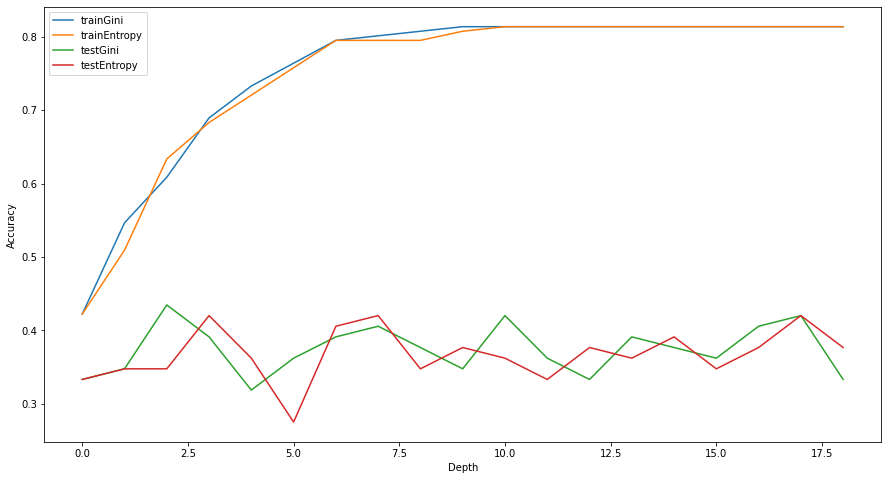

 Accuracy of test data = 0.4348
 Depth of the optimal tree = 3


In [37]:
# Use the Decision Tree algorithm to post - pruning
#We can know The accuracy of the test data and the depth of the optimal tree
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

for k in tqdm_notebook(range(1, 20)):
   
    model = DecisionTreeClassifier(criterion='gini', max_depth=k)
    model.fit(X_train, Y_train)
    
    trainGini.append(model.score(X_train, Y_train))
    testGini.append(model.score(X_test, Y_test))
    
    model = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    model.fit(X_train, Y_train)
    
    
    trainEntropy.append(model.score(X_train, Y_train))
    testEntropy.append(model.score(X_test, Y_test))
    
    depth.append(k)
    print('depth = %d done.' % k)

plt.figure(figsize=(15, 8))
plt.plot(trainGini, label='trainGini')
plt.plot(trainEntropy, label='trainEntropy')
plt.plot(testGini, label='testGini')
plt.plot(testEntropy, label='testEntropy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

# Find the best depth with the greatest accuracy
nDepth = depth[np.argmax(testGini)]

#Use the tree with opt_alpha applied.
model = DecisionTreeClassifier(max_depth = nDepth)
model.fit(X_train, Y_train)
print(' Accuracy of test data = %.4f' % model.score(X_test, Y_test))
print(' Depth of the optimal tree = %d' % nDepth)

In [38]:
#Set max_depth to the maximum depth obtained above.
#This time, we will compare the accuracy of various models and analyze them by applying model.
train_result = []
test_result = []
model_criterion = []
model_max_depth = []
parameter_min_leaf = []

insert_criterion = ['gini', 'entropy']
max_depth = 3
list_min_leaf= [i for i in range(1,10)]
for i in insert_criterion:
    for n in list_min_leaf:
        tree = DecisionTreeClassifier(criterion=i, max_depth=max_depth,min_samples_leaf=n, random_state=1000)
        tree.fit(X_train, Y_train)
        train_result.append(tree.score(X_train, Y_train))
        test_result.append(tree.score(X_test, Y_test))
        model_criterion.append(i)
        model_max_depth.append(max_depth)
        parameter_min_leaf.append(n)
        
result = pd.DataFrame()
result["Criterion"] =  model_criterion
result["Depth"] = max_depth
result["MinLeafSize"] = parameter_min_leaf
result["TrainAccuracy"] = train_result
result["TestAccuacy"] = test_result
result

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuacy
0,gini,3,1,0.608696,0.434783
1,gini,3,2,0.608696,0.434783
2,gini,3,3,0.602484,0.420290
3,gini,3,4,0.596273,0.420290
4,gini,3,5,0.590062,0.420290
5,gini,3,6,0.590062,0.420290
6,gini,3,7,0.590062,0.420290
7,gini,3,8,0.583851,0.391304
8,gini,3,9,0.583851,0.391304
9,entropy,3,1,0.633540,0.347826


<AxesSubplot:xlabel='MinLeafSize', ylabel='value'>

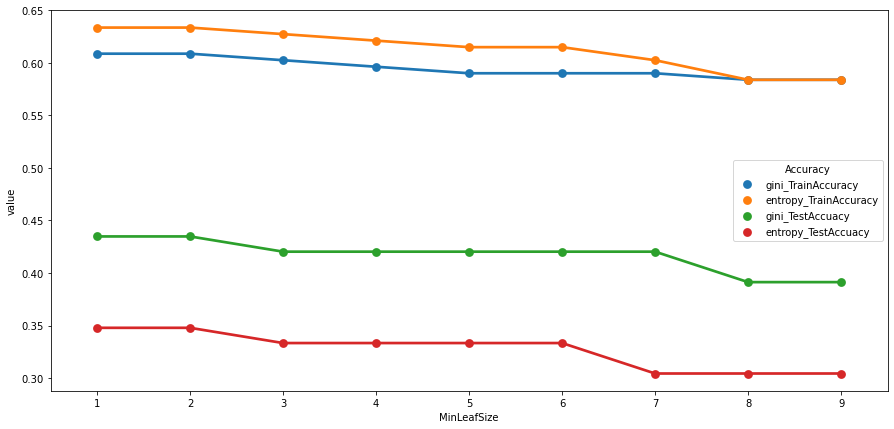

In [43]:
#The most accurate training model and test model can be found easily using the ogmelt function and visualization.
plt.figure(figsize=(15,7))
result_melt = pd.melt(result, id_vars = ['Criterion', 'Depth', 'MinLeafSize'])
result_melt['Accuracy'] = result_melt['Criterion']+'_'+result_melt['variable']
sns.pointplot(data=result_melt, x='MinLeafSize', y='value', hue='Accuracy')

In [40]:
#The tree model with a min leaf size of 2 of the entropy model appears to be the best fit. Let's reset the model to create a model.
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf=2, random_state = 1000)
model1.fit(X_train, Y_train)

print("Training Set Accuracy {:.3f}".format(model.score(X_train,Y_train)))
print("Test Set Accuracy: {: .3f}".format(model.score(X_test, Y_test)))

Training Set Accuracy 0.609
Test Set Accuracy:  0.435


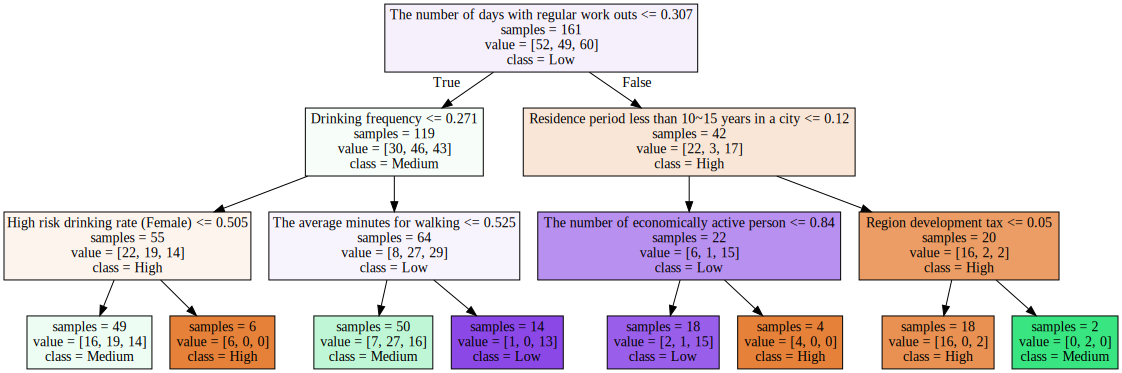

'tree.png.pdf'

In [41]:
#Accuracy was 60.9% training data and 43.5% testing data. So, we used the graphviz library to graph the actual tree structure.
export_graphviz(model1, out_file='tree1.dot',
               feature_names=X.columns, impurity = False, filled = True, class_names=['High', 'Medium', 'Low'])


os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz 2.38/bin/'
with open("tree1.dot", encoding = 'utf-8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


graphviz.Source(dot_graph) .render(filename='tree.png') # png로 저장

NameError: name 'fig' is not defined

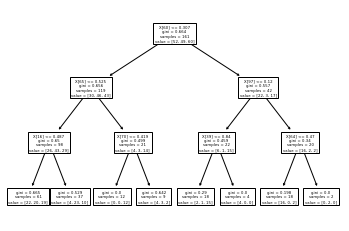

In [42]:
#Also visualize Decision Trees using Matplotlib
from sklearn import tree

tree.plot_tree(model)

